In [2]:
import numpy as np
import pandas as pd
from konlpy.tag import *
import matplotlib.pylab as plt
%matplotlib inline
from korean_crawling_bundles import *
import datetime

In [3]:
train_df = pd.read_csv('{}_with_link.csv'.format(str(datetime.datetime.now().month) + str(datetime.datetime.now().day),index=False))
train_df.tail()

,Title,Link,Doc
43,"팀원은 모두 엄마, 사무실엔 놀이매트 있어요",http://v.media.daum.net/v/20181110123001286,[오마이뉴스 백선기 기자]\n부모교육 전문기업 '그로잉맘(Growing Mom)' ...
44,NaN,https://finance.naver.com/news/news_read.nhn?a...,[머니투데이 뉴욕(미국)=송정렬 특파원]\n유가가 심상치 않다. 유가는 전고점 대비...
45,NaN,https://finance.naver.com/news/news_read.nhn?a...,"국내주식형펀드, 한주간 3.84% 올라..레버리지펀드↑\n글로벌 증시 반등..북미·..."
46,NaN,https://finance.naver.com/news/news_read.nhn?a...,[머니투데이 뉴욕(미국)=송정렬 특파원]\n뉴욕증시가 하락했다. 지속적인 유가하락이...
47,[유럽증시]유가하락·세계경제 둔화 우려에..'약세',https://finance.naver.com/news/news_read.nhn?a...,[이데일리 뉴스속보팀] 9일(현지시간) 유럽 주요국 증시는 유가 하락과 세계경제 둔...


In [5]:
train = train_df['Doc'].values
train_report = [train[i] for i in range(len(train))]
print(len(train_report))
train_report[0]

48


'[머니투데이 뉴욕(미국)=송정렬 특파원]\n유가가 심상치 않다. 유가는 전고점 대비 20% 이상 떨어져 약세장에 진입한 이후에도 하락세를 이어갔다. 장중 한때 배럴당 60달러선이 무너지기도 했다. 지속적인 유가하락이 글로벌 경제 둔화 공포를 확대하면서 뉴욕증시도 하락했다.\n\n월가전문가들은 유가하락, 기업실적 부진, 중국의 부진한 경제지표 등 글로벌 경제 둔화를 알리는 경고음이 커지고 있다고 지적했다.\n\n9일(현지시간) 다우존스산업평균지수는 전일대비 201.92포인트(0.8%) 하락한 2만5989.30으로 거래를 마쳤다.\n\nS&P500지수는 전일대비 25.82포인트(0.9%) 떨어진 2781.01로 장을 마감했다. 기술(-1.7%), 임의소비재(-1.5%), 통신서비스(-1.5%) 등이 지수하락을 주도했다. 기술주 중심의 나스닥종합지수는 7406.90으로 전일대비 123.98포인트(1.7%) 밀렸다.\n\n벤자민 라우 에프리엄어드바이저 최고투자책임자는 "전반적인 추세는 분명히 약화되고 있다. 일부 기업실적에서 이를 확인할 수 있다"며 "글로벌 경제가 바닥부터 꼭대기까지 약해지고 있다는 더 많은 일화적 증거들을 보고 있다"고 강조했다.\n\n윌리 델위체 베어드 투자전략가는 "유가의 약세장이 투자자들을 괴롭힐 수 있다"며 "유가 하락세는 글로벌 경제가 어려운 상황에 처해있다는 신호가 될 수 있다"고 분석했다.\n\n그는 이어 “유가하락에 대한 초기 반응은 중산층에게 이득이 된다는 것이었지만, 과거에 비해 휘발유에 쓰는 미국 소비자들의 예산 비중이 더 적기 때문에 소비자신뢰도가 더 올라갈 여지는 많지 않다는 점을 고려하며 이 시각은 잘못됐을 수 있다”며 “최근 유가하락이 2015년과 2016년 유가붕괴의 재현이라며 미국 투자와 기업실적에 의미있는 영향을 줄 수 있다”고 내다봤다.\n\n애런 클라크 GW&K투자운용 포트폴리오매니저는 "실적시즌이 끝나면서 거시적 이슈들이 올해 나머지 기간에 투자자들의 생각을 지배할 것"이라며 "이탈리아와 유럽연합간 예산안 갈

In [22]:
kkma = Kkma()

try:
    training_ls = [str(kkma.nouns(train_report[i])) for i in range(len(train_report))]
except : 
    excepted_ls.append(i)
    print('{}th data is excepted, maybe it has NaN value'.format(i))
    
display(Markdown('#### length of data : {}'.format(len(training_ls))))

#### length of data : 48

In [7]:
word_df = pd.DataFrame(data = training_ls,columns=np.arange(1))
word_df.tail()

,0
43,"['오', '오마이뉴스', '마이', '뉴스', '백선', '백선기', '기', '..."
44,"['머니', '머니투데이', '투데이', '뉴욕', '미국', '송', '송정렬',..."
45,"['국내', '국내주식', '주식', '펀드', '주간', '3.84', '레버리지..."
46,"['머니', '머니투데이', '투데이', '뉴욕', '미국', '송', '송정렬',..."
47,"['이', '이데일리', '데일리', '뉴스', '뉴스속보팀', '속보', '팀',..."


# 데이터 프레임을 튜닝한다.

In [9]:
for i in range(len(word_df)) : 
    word_df.iat[i,0] = word_df.iat[i,0][1:-1]
    
word_ls = []
for i in range(len(word_df)) : 
    new_ls = word_df.iat[i,0].split(',')

    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace(' ','')
    
    for i in range(len(new_ls)) : 
        new_ls[i] = new_ls[i].replace("'",'')
    
    word_ls += new_ls
len(word_ls)

12182

# 단어가 유의미하려면 길이가 3개 이상이여야한다고 가정, 조건 아래 걸러내준다.

In [11]:
print(len(word_ls))
for _ in range(10):
    for idx,i in enumerate(word_ls) : 
        if len(i) < 3:
             word_ls.pop(idx)
    print(len(word_ls))

12182
7213
4862
3991
3822
3816
3816
3816
3816
3816
3816


# 무엇이 많이 나온 단어인지 갯수를 달아주고 빈도수에 따라 배열한다.

In [12]:
from collections import Counter
cnt_dict = dict(Counter(word_ls))

df = pd.DataFrame(columns=['Count'])
df['Count'] = cnt_dict.values()
df.index = cnt_dict.keys()
df.sort_values('Count',ascending=False,inplace=True)

df

,Count
현지시간,21
글로벌,18
대통령,17
트럼프,16
전문가,16
연합뉴스,15
10일,15
가운데,14
포인트,12
특파원,11


# Zig's law 를 따르는 것을 볼 수 있다.

,Count
count,2268.000000
mean,1.682540
std,1.594464
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,21.000000


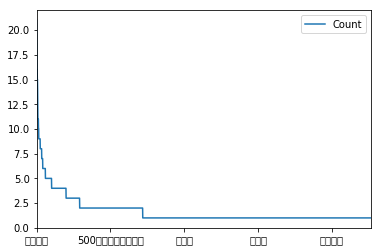

In [13]:
display(df.describe())
display(df.plot())

# 한번 이상 나온 단어들이 얼마나 될까 갯수를 세어준다.

In [14]:
testing_ls = list(df[df['Count']>1].index)
len(testing_ls)

719

- 현재 나는 빈도수에 따른 단어 그 자체만 알기 때문에, 나중에 할 추천 프로세스를 위해서 데이터 프레임에서 몇 번째 인덱스인지를 파악하기 위해서 아래의 프로세스를 시행한다.

In [15]:
count_dictionary = dict(zip(np.arange(len(train_df)),[0 for _ in range(len(train_df))]))
for idx,doc in enumerate(train_df['Doc']):
    for word in testing_ls : 
        if word in doc : 
            count_dictionary[idx] += 1
count_dictionary

{0: 106,
 1: 149,
 2: 216,
 3: 58,
 4: 34,
 5: 73,
 6: 28,
 7: 66,
 8: 44,
 9: 47,
 10: 41,
 11: 53,
 12: 52,
 13: 36,
 14: 17,
 15: 64,
 16: 44,
 17: 16,
 18: 38,
 19: 98,
 20: 36,
 21: 19,
 22: 45,
 23: 40,
 24: 15,
 25: 15,
 26: 22,
 27: 17,
 28: 10,
 29: 36,
 30: 13,
 31: 29,
 32: 9,
 33: 34,
 34: 12,
 35: 75,
 36: 11,
 37: 5,
 38: 18,
 39: 31,
 40: 63,
 41: 10,
 42: 2,
 43: 30,
 44: 106,
 45: 150,
 46: 216,
 47: 58}

# 보기 좋게 데이터 프레임으로 만들고 빈도수에 따라서 나열한다.

In [16]:
final_df = pd.DataFrame(columns=['Count'])
final_df['Count'] = count_dictionary.values()
final_df.index = count_dictionary.keys()
final_df.sort_values('Count',ascending=False,inplace=True)

final_df

,Count
2,216
46,216
45,150
1,149
0,106
44,106
19,98
35,75
5,73
7,66


In [17]:
most_freq = final_df.iloc[:5]
least_freq = final_df.iloc[-5:]

In [18]:
display(most_freq)
display(least_freq)

,Count
2,216
46,216
45,150
1,149
0,106


,Count
41,10
28,10
32,9
37,5
42,2


# 빈도수에 따라서 많이 나온 것과 조금 나온 것을 따로 추출한다.

In [19]:
most_freq_link = []
least_freq_link = []

for idx in list(most_freq.index) : 
    most_freq_link.append(train_df['Link'][idx])
for idx in list(most_freq.index) :     
    least_freq_link.append(train_df['Link'][idx])
print(len(most_freq_link) , len(least_freq_link))

5 5


In [20]:
display(most_freq_link)
display(least_freq_link)

['https://finance.naver.com/news/news_read.nhn?article_id=0004130687&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004130687&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004247784&office_id=018&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004247784&office_id=018&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004130696&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1']

['https://finance.naver.com/news/news_read.nhn?article_id=0004130687&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004130687&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004247784&office_id=018&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004247784&office_id=018&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004130696&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1']

## 많이 나온 것과 조금 나온 것이 모두 유의미할 것이라는 가정 아래, 이들의 링크의 교집합을 구해준다.

In [21]:
set(most_freq_link).union(set(least_freq_link))

{'https://finance.naver.com/news/news_read.nhn?article_id=0004130687&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004130696&office_id=008&mode=mainnews&type=&date=2018-11-10&page=1',
 'https://finance.naver.com/news/news_read.nhn?article_id=0004247784&office_id=018&mode=mainnews&type=&date=2018-11-10&page=1'}